## Homework 2
From Chapter 3, found on pages 129-130 of ISLP

*This question involves the use of simple linear regression on the Auto data set*

In [9]:
# Import standard libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import subplots
import statsmodels.api as sm
import warnings # for muting warning messages

# mute warning messages
warnings.filterwarnings('ignore')
# Import specific objects
from statsmodels.graphics.gofplots import ProbPlot
from statsmodels.stats.outliers_influence import OLSInfluence
from ISLP import load_data
from ISLP.models import (ModelSpec as MS,
                         summarize,
                         poly)

# Load dataset
Auto = load_data('Auto')
Auto

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
387,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
388,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
389,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
390,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


a)	Produce a scatterplot matrix which includes all of the numeric variables in the data set.

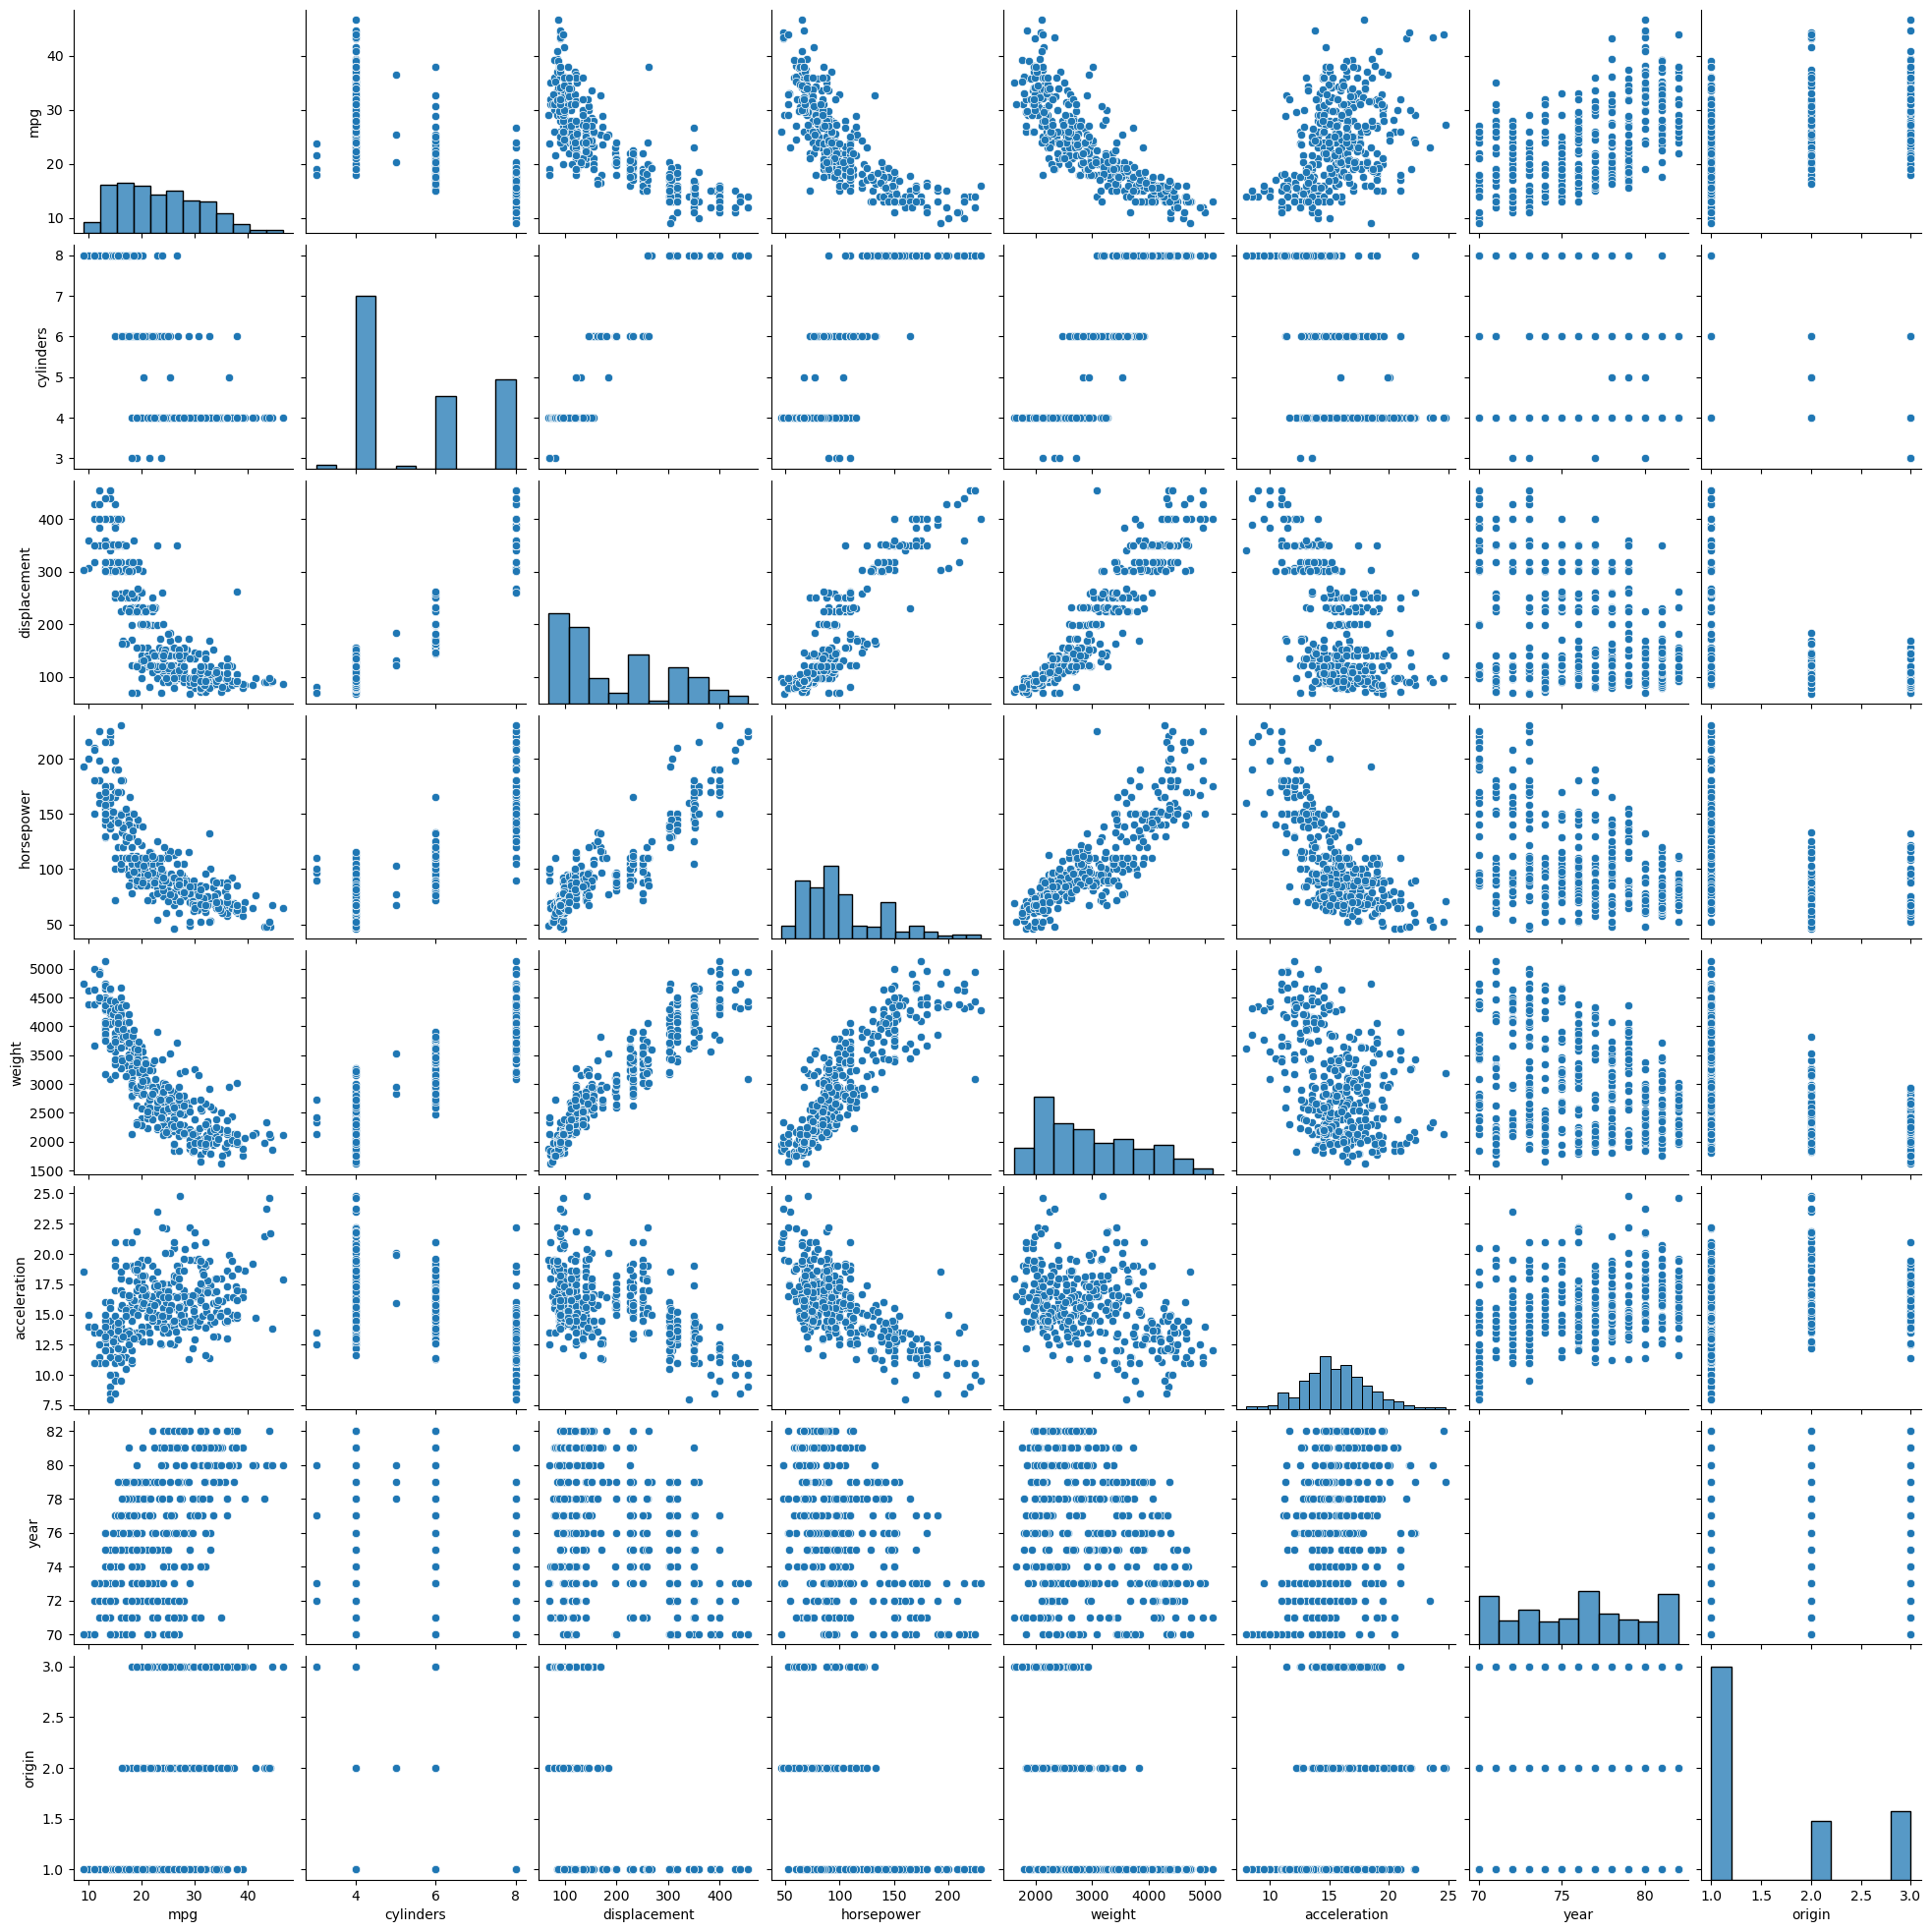

In [10]:
#Add your code here
# Select numeric columns only
numeric_columns = Auto.select_dtypes(include=['float64', 'int64'])

# Produce scatterplot matrix
sns.pairplot(numeric_columns)
plt.show()

b)	Compute the matrix of correlations between the variables using the `DataFrame.corr()` method, and print it.

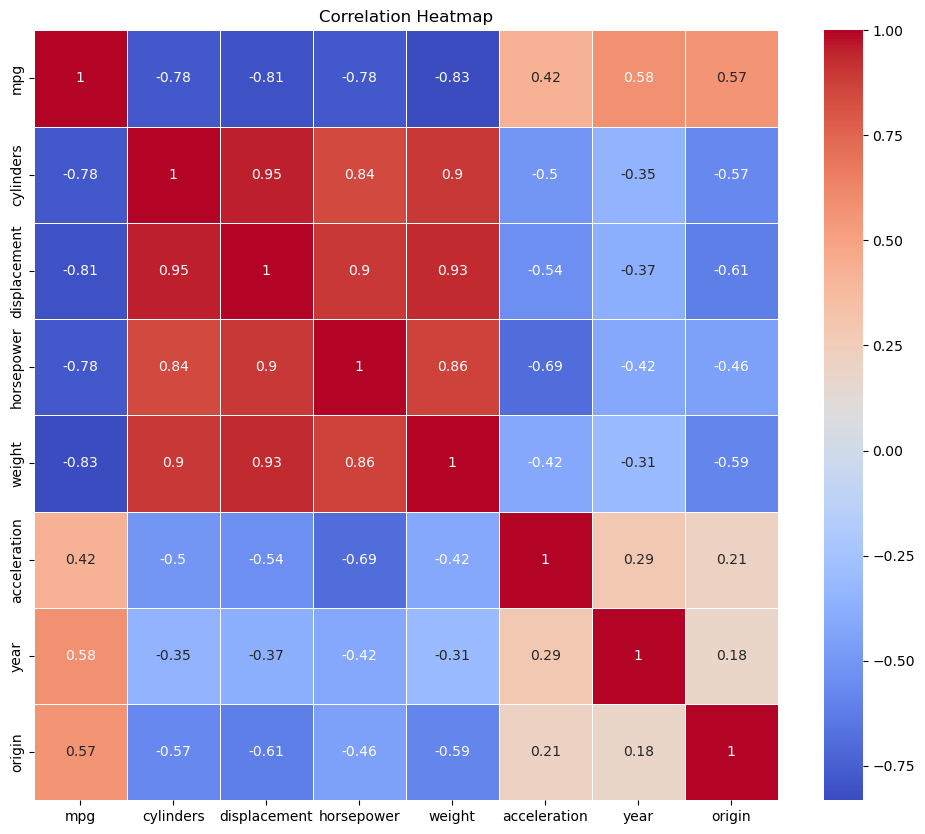

In [12]:
#Add your code here
corr = numeric_columns.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

c) Use the `sm.OLS()` function to perform a multiple linear regression with mpg as the response and all other variables except name as the predictors. Use the `model.summary()` function to print the results. Comment on the output: 

(i)  Is there a relationship between the predictors and the response?
- Yes. 
- The **p-value associated with the F-statistic** less than 0.05 suggests that at least one of the predictors is related to the response.
- A high **F-statistic** indicates the overall statistical significance of the regression model.

(ii) Which predictors appear to have a statistically significant relationship to the response?
- Predictors with small **p-value associated with coefficients** are considered to have a significant relationship with the response variable:
    - displacement
    - weight
    - year
    - origin

(iii) What does the coefficient for the year variable suggest ?
- The positive coefficient suggests that as the year variable increases, the mpg tends to increase, indicating a positive relationship between mpg and year. 

In [13]:
#Add your code here
X = numeric_columns.drop(columns=['mpg'])
y = numeric_columns['mpg']
result = sm.OLS(y, sm.add_constant(X)).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     252.4
Date:                Tue, 04 Jun 2024   Prob (F-statistic):          2.04e-139
Time:                        14:49:34   Log-Likelihood:                -1023.5
No. Observations:                 392   AIC:                             2063.
Df Residuals:                     384   BIC:                             2095.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -17.2184      4.644     -3.707      0.000     -26.350      -8.087
cylinders       -0.4934      0.323     -1.526      0.128      -1.129       0.142
displacement     0.0199      0.008      2.647      0.008       0.005       0.035
horsepower      -0.0170      0.014     -1.230      0.220      -0.044       0.010
weight          -0.0065      0.001     -9.929      0.000      -0.008      -0.005
acceleration     0.0806      0.099      0.815      0.415      -0.114       0.275
year             0.7508      0.051     14.729      0.000       0.651       0.851
origin           1.4261      0.278      5.127      0.000       0.879       1.973
==============================================================================
Omnibus:                       31.906   Durbin-Watson:                   1.309
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               53.100
Skew:                           0.529   Prob(JB):                     2.95e-12
Kurtosis:                       4.460   Cond. No.                     8.59e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.59e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

d) Produce some of diagnostic plots of the linear regression fit as described in the lab. Comment on any problems you see with the fit. Do the residual plots suggest any unusually large outliers? Does the leverage plot identify any observations with unusually high leverage?

- Yes, the residual plots suggest unusually large outliers, it indicates that there are data points for which the model's predictions are substantially different from the actual observed values. 
- Yes, there is a point far away from the rest of the points on the plot with an extreme value on the x-axis (leverage), it indicates a potentially influential observation with high leverage.

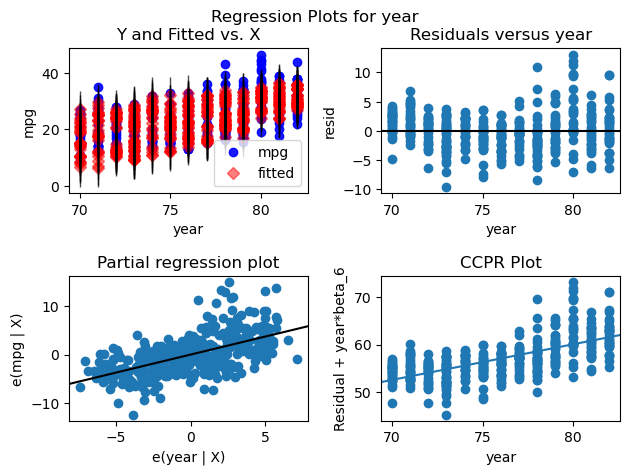

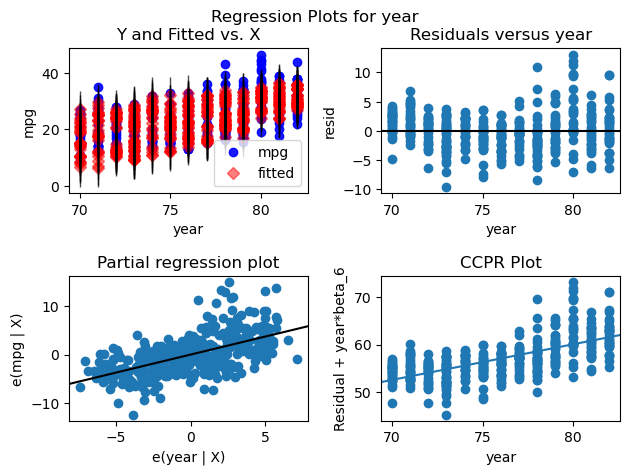

In [14]:
#Add your code here Residuals vs Fitted Values
# Method 1 sm.graphics can only explore one X with y at one time
sm.graphics.plot_regress_exog(result, 'year')

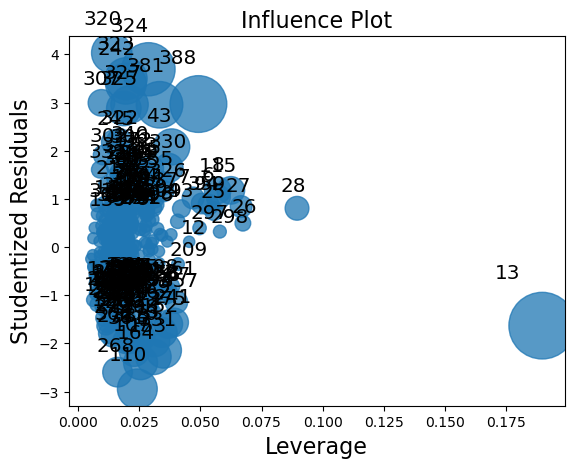

In [25]:
# The influence plot, generated using sm.graphics.influence_plot, 
# is a diagnostic tool in regression analysis that helps identify influential points in the dataset.
# Create the influence plot
fig, ax = plt.subplots(figsize=(6.4,4.8))
sm.graphics.influence_plot(result, exog_idx=result.model.exog_names.index('year'), ax=ax, alpha=0.5, marker='', markersize=0, markeredgewidth=0)
plt.show()

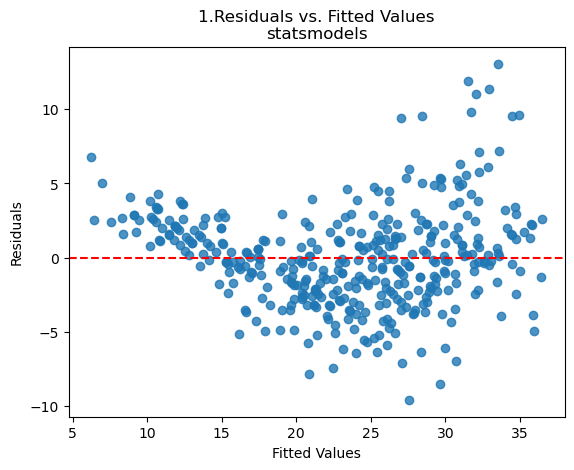

In [9]:
# Method 2
y_pred = result.fittedvalues
residuals =y-y_pred
plt.figure(figsize=(6.4, 4.8))
plt.scatter(y_pred, residuals, alpha=0.8)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('1.Residuals vs. Fitted Values\nstatsmodels')
plt.show()
# Only some of the points in the residual plot are clustered around y = 0, 
# it suggests that the model is not performing well to capture the overall trend in the data. 
# Additionally, the presence of outliers can indicate that the model may not 
# be accurately capturing certain patterns or relationships in the data.

<Figure size 640x480 with 0 Axes>

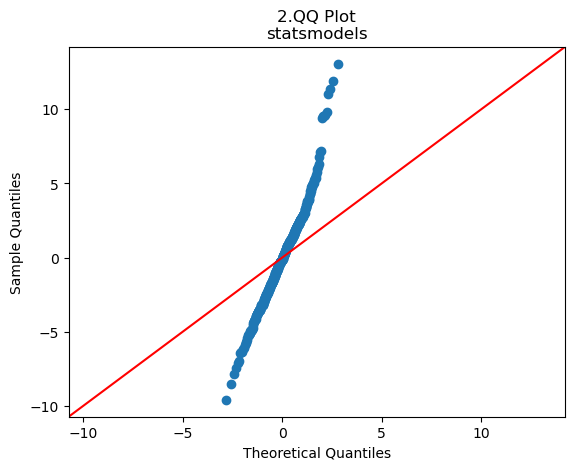

In [10]:
#Add your code here to plot QQ Plot
plt.figure(figsize=(6.4, 4.8))
sm.qqplot(residuals, line='45')
plt.title('2.QQ Plot\nstatsmodels')
plt.show()
# The slope of the points in a QQ plot is greater than 45 degrees, 
# it suggests that the data distribution has heavier tails compared to the theoretical distribution.
# The data has more extreme values (heavier tails) than expected under the assumed distribution. 
# This could imply that the data has more variability or outliers than expected.

e) Fit some models with interactions as described in the lab. Do any interactions appear to be statistically significant?
- Yes.
- According to below (method 3), the interactions among the top 4 significant numeric columns that have p-values less than 0.05:
    - year:weight:displacement, P-value: 9.867324743045383e-17
    - year:weight, P-value: 8.015485561513319e-14
    - year:displacement, P-value: 4.95542771155867e-13
    - year:origin:displacement, P-value: 1.015872736466537e-09
    - weight:displacement, P-value: 1.0623063020997735e-09
    - year:weight:origin, P-value: 2.570667465849085e-05
    - origin:displacement, P-value: 0.0006396803722013126


In [12]:
#Add your code here
#Method 1
model = sm.OLS.from_formula('mpg ~ weight * year * origin', data=Auto)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     309.7
Date:                Tue, 04 Jun 2024   Prob (F-statistic):          1.23e-153
Time:                        03:04:38   Log-Likelihood:                -989.97
No. Observations:                 392   AIC:                             1996.
Df Residuals:                     384   BIC:                             2028.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           -217.0136     35.511     -6.111      0.000    -286.834    -147.193
weight                 0.0720      0.013      5.398      0.000       0.046       0.098
year                   3.3307      0.466      7.147      0.000       2.414       4.247
weight:year           -0.0010      0.000     -5.749      0.000      -0.001      -0.001
origin                99.6127     25.079      3.972      0.000      50.303     148.923
weight:origin         -0.0431      0.011     -3.995      0.000      -0.064      -0.022
year:origin           -1.2357      0.325     -3.798      0.000      -1.876      -0.596
weight:year:origin     0.0005      0.000      3.861      0.000       0.000       0.001
==============================================================================
Omnibus:                       51.557   Durbin-Watson:                   1.465
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              120.108
Skew:                           0.675   Prob(JB):                     8.30e-27
Kurtosis:                       5.352   Cond. No.                     1.13e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.13e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [15]:
# Method 2

X['weight_year_origin'] = X['weight'] * X['year'] * X['origin'] # Interaction term
X = sm.add_constant(X)  # Add a constant term for the intercept
y = Auto['mpg']  # Response variable

# Fit the regression model with interaction term
model_interaction = sm.OLS(y, X)
results_interaction = model_interaction.fit()

# Review the summary of the regression results
print(results_interaction.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     230.5
Date:                Tue, 04 Jun 2024   Prob (F-statistic):          2.76e-141
Time:                        03:10:43   Log-Likelihood:                -1016.2
No. Observations:                 392   AIC:                             2050.
Df Residuals:                     383   BIC:                             2086.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                -31.9051      5

In [5]:
# Method 3. use loop to calculate all possible interactions' p-values
import statsmodels.formula.api as smf
from itertools import combinations
df=Auto
target_variable='mpg'
# 1) Select all numeric columns except the target variable
numeric_columns = df.select_dtypes(include='number').columns.drop(target_variable).tolist()

# 2) Fit a multiple linear OLS model to get p-values for all numeric columns
X = df[numeric_columns]
y = df[target_variable]
# Add a constant to the model
X = sm.add_constant(X)
# Fit the model
model = sm.OLS(y, X).fit()

# 3) Get p-values and sort them
p_values = model.pvalues.drop('const').sort_values()

# 4) Get the top 4 columns based on p-values
top_columns = p_values.index[:4].tolist()
print("Top 4 columns based on p-values:")
print(top_columns)

# Initialize a list to store the results
results = []
# 5) Generate all possible combinations of interactions (from 1 to 4 columns)
for i in range(1, len(top_columns) + 1):
    for interaction in combinations(top_columns, i):
        interaction_term = ':'.join(interaction)
        
        # Define the formula for the model
        formula = 'mpg ~ ' + ' + '.join(interaction) + (' + ' + interaction_term if len(interaction) > 1 else '')
        
        # Fit the model
        model = smf.ols(formula=formula, data=Auto).fit()
        
        # Get the p-value of the interaction term if it exists
        p_value = model.pvalues.get(interaction_term, None)
        
        # Store the interaction term and its p-value if available
        if p_value is not None:
            results.append((interaction_term, p_value))

# 6) Sort the results by p-value in ascending order
sorted_results = sorted(results, key=lambda x: x[1])

# 7) Display the sorted results
for term, p_value in sorted_results:
    print(f'Interaction: {term}, P-value: {p_value}')


Top 4 columns based on p-values:
['year', 'weight', 'origin', 'displacement']
Interaction: weight, P-value: 6.015296051435213e-102
Interaction: displacement, P-value: 1.6606418277980233e-90
Interaction: year, P-value: 1.0757935564159873e-36
Interaction: origin, P-value: 1.8110801807967613e-34
Interaction: year:weight:displacement, P-value: 9.867324743045383e-17
Interaction: year:weight, P-value: 8.015485561513319e-14
Interaction: year:displacement, P-value: 4.95542771155867e-13
Interaction: year:origin:displacement, P-value: 1.015872736466537e-09
Interaction: weight:displacement, P-value: 1.0623063020997735e-09
Interaction: year:weight:origin, P-value: 2.570667465849085e-05
Interaction: origin:displacement, P-value: 0.0006396803722013126
Interaction: weight:origin:displacement, P-value: 0.011778559541634521
Interaction: year:weight:origin:displacement, P-value: 0.038824513603113786
Interaction: weight:origin, P-value: 0.04230193432148837
Interaction: year:origin, P-value: 0.06211122632

f) Try a few different transformations of the variables, such as log⁡(X),√X,X^2. Comment on your findings.

_My findings:_

**Weight Variable**:
- Transformed type: Log transformation
- Conclusion: The original p-value for the weight variable is extremely small, indicating a highly significant relationship with the response variable (mpg). After applying a log transformation to the weight variable, the significance level remains extremely low, suggesting that the log transformation does not significantly alter the relationship between weight and mpg.

**Year Variable**:
- Transformed type: Square root transformation
- Conclusion: Similar to the weight variable, the original p-value for the year variable is extremely small, indicating a highly significant relationship with mpg. After applying a square root transformation to the year variable, the significance level remains extremely low, suggesting that the square root transformation does not significantly alter the relationship between year and mpg.

**Displacement Variable:**
- Transformed type: Squared transformation
- Conclusion: The original p-value for the displacement variable is 
0.242, which is relatively large and indicates a lack of significance at the conventional significance level (e.g., 0.05). 
- However, after applying a squared transformation to the displacement variable, the transformed p-value becomes 0.000131, indicating a significant relationship with mpg. This suggests that the squared transformation helps reveal a significant relationship that was not apparent in the original form of the variable.

- Overall, these findings suggest that transformations may have different effects on the significance of predictor variables. While transformations may not significantly alter the relationship between certain variables and the response, they can uncover hidden relationships in other cases. It's essential to consider both the original and transformed p-values when interpreting the significance of predictor variables in regression analysis.

In [26]:
#Add your code here
df=Auto
# Apply transformations to the variables
df['log_weight'] = np.log(df['weight'])
df['sqrt_year'] = np.sqrt(df['year'])
df['squared_displacement'] = df['displacement'] ** 2

# Fit original model and transformed models
original_model = smf.ols(formula='mpg ~ weight + year + origin + displacement', data=df).fit()
log_model = smf.ols(formula='mpg ~ log_weight + year + origin + displacement', data=df).fit()
sqrt_model = smf.ols(formula='mpg ~ weight + sqrt_year + origin + displacement', data=df).fit()
squared_model = smf.ols(formula='mpg ~ weight + year + origin + squared_displacement', data=df).fit()

# Compare the models
print("Original Model:")
print(original_model.summary())
print("\nLog Transformation:")
print(log_model.summary())
print("\nSquare Root Transformation:")
print(sqrt_model.summary())
print("\nSquared Transformation:")
print(squared_model.summary())

Original Model:
                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     435.1
Date:                Tue, 04 Jun 2024   Prob (F-statistic):          9.57e-142
Time:                        15:02:34   Log-Likelihood:                -1027.2
No. Observations:                 392   AIC:                             2064.
Df Residuals:                     387   BIC:                             2084.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      -18.6065      4.0

In [32]:
# Extract variable names and original p-values
variables = ['weight', 'year', 'displacement']
original_pvalues = original_model.pvalues[variables]

# Extract transformed variables' p-values
log_pvalues = log_model.pvalues['log_weight']
sqrt_pvalues = sqrt_model.pvalues['sqrt_year']
squared_pvalues = squared_model.pvalues['squared_displacement']

# Create DataFrame to show the comparisons
data = {
    'predictor': variables,
    'original p-values': original_pvalues,
    'transformed type': ['log', 'sqrt', 'squared'],
    'transformed p-values': [log_pvalues, sqrt_pvalues, squared_pvalues]
}

pvalues_table = pd.DataFrame(data)

# Display the p-values table
print(pvalues_table)


                 predictor  original p-values transformed type  \
weight              weight       1.140713e-27              log   
year                  year       1.959156e-42             sqrt   
displacement  displacement       2.419437e-01          squared   

              transformed p-values  
weight                7.216022e-40  
year                  4.821001e-42  
displacement          1.306477e-04  


Additional Practice Questions: 
- Question: Explain the difference between MLR and OLS to a non-technical audience. 

_My answer:_

**MLR (Multiple Linear Regression):** 

- Imagine we want to predict a car's miles per gallon (mpg) based on multiple factors, like its weight, year of manufacture, and engine displacement. MLR helps us figure out how these different factors work together to predict the car's mpg.

**OLS (Ordinary Least Squares):**

- Now, let's say we've collected data on thousands of cars, including their weights, years, displacements, and mpg. We can use OLS to find the best-fitting line through our data points. This line minimizes the "mistakes" between the actual mpg values and the mpg values predicted by our model, based on the car's weight, year, and displacement.

- So, in this example, MLR is like gathering multiple clues (weight, year, displacement) to predict a car's mpg, and OLS is the technique we use to adjust our prediction line so that it fits our data as closely as possible.

- Question: How would you describe this exercise in an interview to both a technical and non-technical interviewer? 

_My answer:_

**To a technical interviewer:**

- We applied Multiple Linear Regression (MLR) using Ordinary Least Squares (OLS) to analyze automobile data.
- Initially, we fitted a baseline regression model using OLS with the original numeric variables as predictors.
- Next, we experimented with different transformations (e.g., logarithmic, square root, squared) on specific predictor variables to potentially improve the model fit.
- We evaluated the performance of each transformed model by comparing their p-values to the original model to identify significant improvements in model fit.

**To a non-technical interviewer:**

- We used regression analysis to understand how factors like weight, year, and displacement relate to a car's miles per gallon (mpg).
- We explored if transforming these factors could provide a better understanding of their impact on a car's fuel efficiency.
- By doing so, we aimed to make more accurate predictions about a car's mpg based on its characteristics.

- Question: What are the key insights you would want to show ? 

_My answer:_

- **The significance of predictor variables**: We identified which predictor variables have the most significant impact on a car's mpg.
- **Effect of transformations**: We observed how different transformations of variables affect the model's performance and significance of predictor variables.
- **Importance of model evaluation**: We demonstrated the importance of evaluating model fit and significance to make informed decisions about variable transformations.

- Question: Can you think of a business context where this exercise would have applications?

_My answer:_

This exercise has applications in various business contexts, such as automotive manufacturing, transportation, and energy efficiency. For example:
- In automotive manufacturing: Understanding how different factors (such as weight, engine displacement) affect a car's fuel efficiency can help manufacturers design more fuel-efficient vehicles.
- In transportation: Predicting a vehicle's fuel efficiency based on its characteristics can help logistics companies optimize their vehicle fleets for cost-effectiveness and environmental sustainability.
- In energy efficiency: Identifying factors that influence fuel efficiency can inform policies and initiatives aimed at reducing energy consumption and emissions in the transportation sector.
- In healthcare research: Applying Multiple Linear Regression (MLR) and Ordinary Least Squares (OLS) can help analyze various factors influencing health outcomes or disease progression. For instance, researchers can use MLR to understand how patient demographics, medical history, and treatment variables collectively affect health outcomes. OLS can then be employed to estimate parameters in regression models, aiding in predicting patient outcomes or exploring relationships between medical interventions and health outcomes.